<a href="https://www.kaggle.com/turksoyomer/hvac-occupancy-detection-with-ml-and-dl-methods?scriptVersionId=89546298" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction
For this kernel, I'm using a dataset for predicting room occupancy with using environmental observations such as temperature, humidity and CO2 level. This predictions might help Heating, Ventilating and Air Conditioning (HVAC) sector. For instance, we are using sensors like thermostats to get information about the environment and with that info our system decides to heat or not situation. But if the thermostat set manually by a occupant before and there is no more occupants in the environment, what then? The system won't shutdown until it gets set values, and this situation will lead high energy consumption. 

Let's start with exploratory data analysis on data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Importing necessary libraries for this notebook.
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from keras.metrics import BinaryAccuracy

/kaggle/input/occupancy-detection-data-set-uci/datatraining.txt
/kaggle/input/occupancy-detection-data-set-uci/datatest.txt
/kaggle/input/occupancy-detection-data-set-uci/datatest2.txt


Using TensorFlow backend.


In [2]:
datatest = pd.read_csv("/kaggle/input/occupancy-detection-data-set-uci/datatest.txt")
datatest2 = pd.read_csv("/kaggle/input/occupancy-detection-data-set-uci/datatest2.txt")
datatraining = pd.read_csv("/kaggle/input/occupancy-detection-data-set-uci/datatraining.txt")

# 2. Exploratory Data Analysis
We have three different .txt file as datatest, datatest2 and datatraining.

In [3]:
print(datatest.info())
datatest.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
print(datatest2.info())
datatest2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
date             9752 non-null object
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [5]:
print(datatraining.info())
datatraining.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


All text files has seven columns as date, temperature, humidity, light, CO2, humidity ratio and occupancy. 
* Temperature in Celsius.
* Relative humidity as a percentage.
* Light measured in lux.
* Carbon dioxide measured in parts per million.
* Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.
* Occupancy as either 1 for occupied or 0 for not occupied.

For training and testing the models, I will use I will use datatraining(8143 instances) as training, datatest(2665 instances) as validation and datatest2(9752 instances) as test data.

In [6]:
datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest.reset_index(drop=True, inplace=True)
datatest2.reset_index(drop=True, inplace=True)
datatraining.reset_index(drop=True, inplace=True)

In [7]:
datatraining.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


Since we have low values like humidity_ratio and high values like light and CO2, we should normalize the data to simplfy the learning process.

In [8]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(datatraining[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


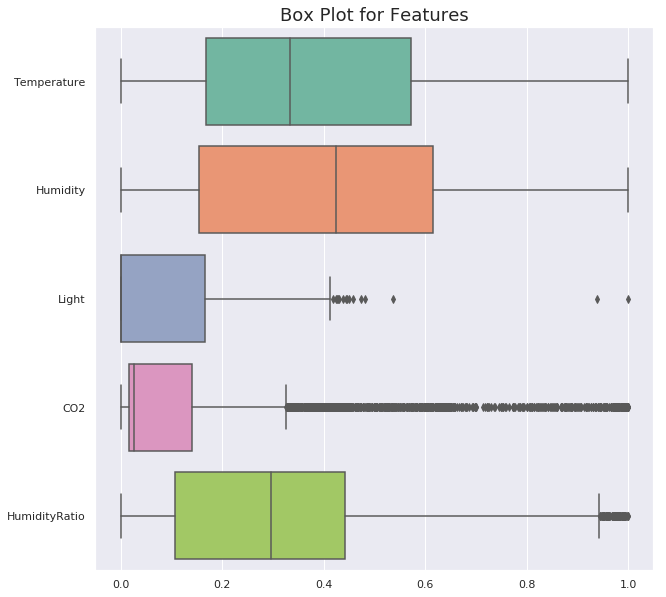

In [9]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=datatraining.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(datatraining.drop(['date', 'Occupancy'],axis=1).describe())

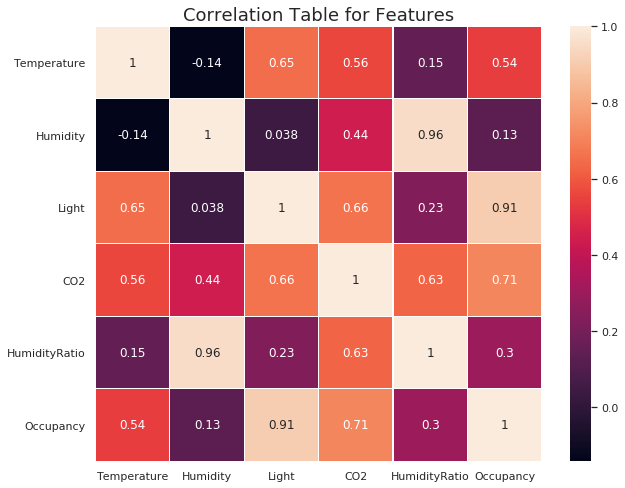

In [10]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(datatraining.corr(), annot=True, linewidths=.2)

We can see the correlations between occupancy and the others. As I expected, light value is more correlated with occupancy than others.

In [11]:
data = datatraining.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='CO2', size='Light', color='Occupancy', color_discrete_map={'1':'red', '0':'blue'})
fig.update_layout(scene_zaxis_type="log", title={'text': "Features and Occupancy",
                                                'y':0.9,
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

Let's look on the 4-dimensional plot for occupancy. The 4th dimension is size of dots here and I used light value as 4th dimension. The higher light will lead to bigger dots and the lower light will lead to smaller dots. You can use your mouse to change your perspective and take a closer look on the graph.

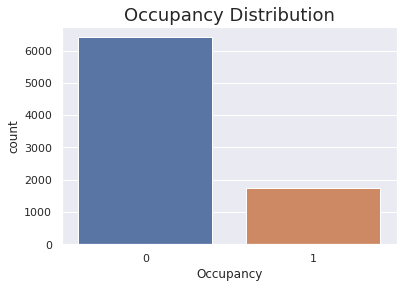

In [12]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=datatraining)

Our data is unbalanced, so we need to find another relations between features to strengthen our predictions. I have a question at this point, is there any relation between occupancy and the hour of the day? Let's look into it.

In [13]:
hours_1 = []
hours_0 = []
for date in datatraining[datatraining['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in datatraining[datatraining['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

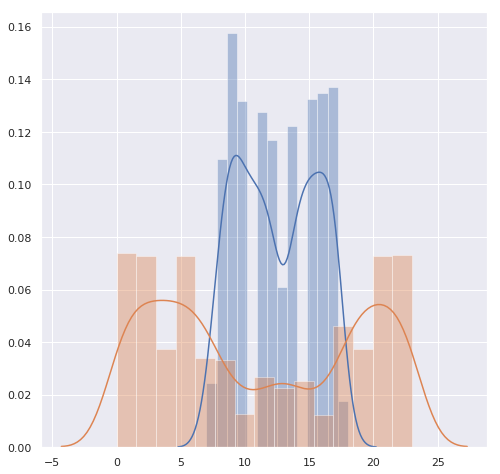

In [14]:
plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

From above histogram, what can you say? Between 07:00 and 18:00 there are occupants in the environment or not. But the time come to non-working hours, then we can absolutely say that there is no occupant. With this information, I will create a new feature from date column as day period.
* 07:00 - 18:00 working hour (labeled as 1)
* rest of the day non-working hour (labeled as 0)

In [15]:
datatest['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest['date']]
datatest2['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest2['date']]
datatraining['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatraining['date']]
datatraining.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
7300,2015-02-09 19:31:00,0.406699,0.847246,0.000000,0.444530,0.716502,0,0
5788,2015-02-08 18:19:00,0.069378,0.480724,0.000000,0.007582,0.296338,0,0
4860,2015-02-08 02:51:00,0.093301,0.639401,0.000000,0.014080,0.433386,0,0
7566,2015-02-09 23:57:00,0.332536,0.722092,0.000000,0.055238,0.579288,0,0
6916,2015-02-09 13:07:00,0.598086,0.739524,0.304592,0.521481,0.687086,1,1
3296,2015-02-07 00:47:00,0.239234,0.087384,0.000000,0.012945,0.005829,0,0
5793,2015-02-08 18:23:59,0.069378,0.480724,0.000000,0.008201,0.296338,0,0
660,2015-02-05 04:51:00,0.478469,0.314896,0.000000,0.021198,0.257765,0,0
3300,2015-02-07 00:51:00,0.239234,0.087384,0.000000,0.011914,0.005829,0,0
7577,2015-02-10 00:08:00,0.332536,0.724327,0.000000,0.055856,0.581253,0,0


# 3. Classification with Machine Learning Methods

In [16]:
X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
y_train = datatraining['Occupancy']
X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_validation = datatest['Occupancy']
X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest2['Occupancy']

## 3.1. KNN (K-Nearest Neighbors)
Let's try different hyperparameters on KNN model such as n_neighbors, weights and metrics to find best options.

In [17]:
# parameter-tuning for knn
n_neighbors_list = [7,15,45,135]
weights_list = ['uniform', 'distance']
metric_list = ['euclidean', 'manhattan']
accuracies = {}
for n in n_neighbors_list:
    for weight in weights_list:
        for metric in metric_list:
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric)
            knn_model.fit(X_train, y_train)
            accuracy = knn_model.score(X_validation, y_validation)
            accuracies[str(n)+"/"+weight+"/"+metric] = accuracy

In [18]:
plotdata = pd.DataFrame()
plotdata['Parameters'] = accuracies.keys()
plotdata['Accuracy'] = accuracies.values()
fig = px.line(plotdata, x="Parameters", y="Accuracy")
fig.update_layout(title={'text': "Accuracies for Different Hyper-Parameters",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

By looking over the accuracies graph:
* 135 is enough for k-value.
* Manhattan distance performs better when k has low value. If k value is higher than usual euclidean is the better option.
* Uniform weights are better.

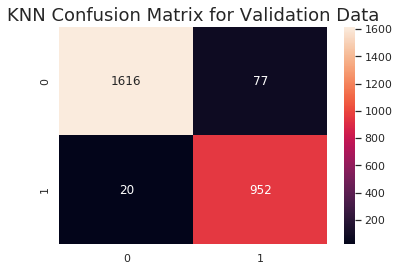

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=135)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_validation)
plt.title("KNN Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

## 3.2. SVM (Support-Vector Machine)

In [20]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("Accuracy for SVM on validation data: {}%".format(round((svm_model.score(X_validation, y_validation)*100),2)))

Accuracy for SVM on validation data: 97.82%


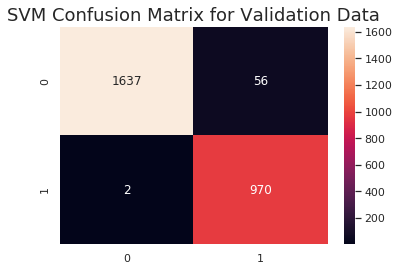

In [21]:
y_pred = svm_model.predict(X_validation)
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

Our Machine Learning models doing well with validation data.

# 4. Classification with Neural Networks
Firsty, I would like to try different models like with or without regularization methods. I will create four different models:
1. Without regularization
2. With 0.2 dropout regularization
3. With L1(Lasso) regularization
4. With L2(Ridge) regularization

After all models trained and evaluated with validation data, we will compare the training and validation losses.

In [22]:
# NN without regularization
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=6))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Train on 8143 samples, validate on 2665 samples
Epoch 1/50
8143/8143 [==============================] - 1s 78us/step - loss: 0.4086 - accuracy: 0.8341 - val_loss: 0.1916 - val_accuracy: 0.9407
Epoch 2/50
8143/8143 [==============================] - 0s 41us/step - loss: 0.1133 - accuracy: 0.9678 - val_loss: 0.1106 - val_accuracy: 0.9542
Epoch 3/50
8143/8143 [==============================] - 0s 41us/step - loss: 0.0750 - accuracy: 0.9778 - val_loss: 0.0976 - val_accuracy: 0.9681
Epoch 4/50
8143/8143 [==============================] - 0s 41us/step - loss: 0.0632 - accuracy: 0.9829 - val_loss: 0.0900 - val_accuracy: 0.9700
Epoch 5/50
8143/8143 [==============================] - 0s 42us/step - loss: 0.0578 - accuracy: 0.9845 - val_loss: 0.0880 - val_accuracy: 0.9719
Epoch 6/50
8143/8143 [==============================] - 0s 41us/step - loss: 0.0534 - accuracy: 0.9858 - val_loss: 0.0867 - val_accuracy: 0.9719
Epoch 7/50
8143/8143 [==============================] - 0s 41us/step - loss: 0.050

In [23]:
# NN with 0.2 dropout ratio before the hidden layer.
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=6))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Train on 8143 samples, validate on 2665 samples
Epoch 1/50
8143/8143 [==============================] - 1s 67us/step - loss: 0.3524 - accuracy: 0.8768 - val_loss: 0.1550 - val_accuracy: 0.9482
Epoch 2/50
8143/8143 [==============================] - 0s 43us/step - loss: 0.1133 - accuracy: 0.9665 - val_loss: 0.0980 - val_accuracy: 0.9629
Epoch 3/50
8143/8143 [==============================] - 0s 43us/step - loss: 0.0762 - accuracy: 0.9775 - val_loss: 0.0922 - val_accuracy: 0.9651
Epoch 4/50
8143/8143 [==============================] - 0s 43us/step - loss: 0.0681 - accuracy: 0.9813 - val_loss: 0.0835 - val_accuracy: 0.9715
Epoch 5/50
8143/8143 [==============================] - 0s 42us/step - loss: 0.0588 - accuracy: 0.9838 - val_loss: 0.0786 - val_accuracy: 0.9767
Epoch 6/50
8143/8143 [==============================] - 0s 44us/step - loss: 0.0575 - accuracy: 0.9839 - val_loss: 0.0774 - val_accuracy: 0.9767
Epoch 7/50
8143/8143 [==============================] - 0s 42us/step - loss: 0.053

In [24]:
# NN with L1(Lasso) regularization
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l1(l=0.01)))
model3.add(Dense(16, activation='relu', kernel_regularizer=l1(l=0.01)))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Train on 8143 samples, validate on 2665 samples
Epoch 1/50
8143/8143 [==============================] - 0s 60us/step - loss: 1.1213 - accuracy: 0.7872 - val_loss: 0.7347 - val_accuracy: 0.6353
Epoch 2/50
8143/8143 [==============================] - 0s 42us/step - loss: 0.4839 - accuracy: 0.8287 - val_loss: 0.4557 - val_accuracy: 0.9028
Epoch 3/50
8143/8143 [==============================] - 0s 40us/step - loss: 0.3569 - accuracy: 0.9628 - val_loss: 0.3473 - val_accuracy: 0.9388
Epoch 4/50
8143/8143 [==============================] - 0s 42us/step - loss: 0.3035 - accuracy: 0.9689 - val_loss: 0.2993 - val_accuracy: 0.9550
Epoch 5/50
8143/8143 [==============================] - 0s 44us/step - loss: 0.2706 - accuracy: 0.9718 - val_loss: 0.2758 - val_accuracy: 0.9542
Epoch 6/50
8143/8143 [==============================] - 0s 42us/step - loss: 0.2440 - accuracy: 0.9759 - val_loss: 0.2469 - val_accuracy: 0.9629
Epoch 7/50
8143/8143 [==============================] - 0s 42us/step - loss: 0.223

In [25]:
# NN with L2(Ridge) Regularization
model4 = Sequential()
model4.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l2(l=0.01)))
model4.add(Dense(16, activation='relu', kernel_regularizer=l2(l=0.01)))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Train on 8143 samples, validate on 2665 samples
Epoch 1/50
8143/8143 [==============================] - 0s 59us/step - loss: 0.5428 - accuracy: 0.9008 - val_loss: 0.3297 - val_accuracy: 0.9441
Epoch 2/50
8143/8143 [==============================] - 0s 41us/step - loss: 0.2548 - accuracy: 0.9681 - val_loss: 0.2347 - val_accuracy: 0.9467
Epoch 3/50
8143/8143 [==============================] - 0s 44us/step - loss: 0.2003 - accuracy: 0.9735 - val_loss: 0.2033 - val_accuracy: 0.9501
Epoch 4/50
8143/8143 [==============================] - 0s 43us/step - loss: 0.1788 - accuracy: 0.9754 - val_loss: 0.1844 - val_accuracy: 0.9595
Epoch 5/50
8143/8143 [==============================] - 0s 42us/step - loss: 0.1656 - accuracy: 0.9776 - val_loss: 0.1730 - val_accuracy: 0.9632
Epoch 6/50
8143/8143 [==============================] - 0s 41us/step - loss: 0.1556 - accuracy: 0.9795 - val_loss: 0.1678 - val_accuracy: 0.9583
Epoch 7/50
8143/8143 [==============================] - 0s 43us/step - loss: 0.147

In [26]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']


fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss without Regularization', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss without Regularization', line = dict(color='firebrick')))

fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss with Dropout', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss with Dropout', line = dict(color='firebrick', dash='dash')))

fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3,
                    name='Training Loss with L1 Regularization', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss with L1 Regularization', line = dict(color='firebrick', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss4)), y=loss4,
                    name='Training Loss with L2 Regularization', line=dict(color='royalblue', dash='longdashdot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss4)), y=val_loss4,
                    name='Validation Loss with L2 Regularization', line = dict(color='firebrick', dash='longdashdot')))


fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for Different Models",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

* NN without regularization is unstabilized as expected.
* Dropout and L2 regularization doing well.
* L1 regularization is stable but it has biggest loss value.

So our best option will be a dropout layer and L2 regularization on layers. Let's train it.

P.S. You can click on the legend to close some of lines. It might be useful when examining the plot.

In [27]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l2(l=0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(l=0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
8143/8143 [==============================] - 0s 55us/step - loss: 0.5752 - accuracy: 0.8648
Epoch 2/50
8143/8143 [==============================] - 0s 36us/step - loss: 0.2502 - accuracy: 0.9566
Epoch 3/50
8143/8143 [==============================] - 0s 36us/step - loss: 0.2040 - accuracy: 0.9643
Epoch 4/50
8143/8143 [==============================] - 0s 36us/step - loss: 0.1783 - accuracy: 0.9689
Epoch 5/50
8143/8143 [==============================] - 0s 36us/step - loss: 0.1618 - accuracy: 0.9756
Epoch 6/50
8143/8143 [==============================] - 0s 36us/step - loss: 0.1540 - accuracy: 0.9754
Epoch 7/50
8143/8143 [==============================] - 0s 35us/step - loss: 0.1451 - accuracy: 0.9794
Epoch 8/50
8143/8143 [==============================] - 0s 34us/step - loss: 0.1427 - accuracy: 0.9800
Epoch 9/50
8143/8143 [==============================] - 0s 36us/step - loss: 0.1335 - accuracy: 0.9805
Epoch 10/50
8143/8143 [==============================] - 0s 36us/step - l

# 5. Comparing Performances of SVM and Neural Network
Let's test our models with the test data. This data has nearly 10000 instances. I will evaluate them with accuracy metric first, after then we will look into confusion matrix.

In [28]:
print("Accuracy for SVM on test data: {}%\n".format(round((svm_model.score(X_test, y_test)*100),2)))
print("Accuracy for Neural Network model on test data: {}%".format(round((model.evaluate(X_test, y_test)[1]*100),2)))

Accuracy for SVM on test data: 98.38%

9752/9752 [==============================] - 0s 21us/step
Accuracy for Neural Network model on test data: 97.93%


Seems very close right?

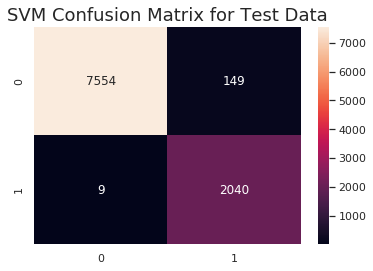

In [29]:
y_pred = svm_model.predict(X_test)
plt.title("SVM Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

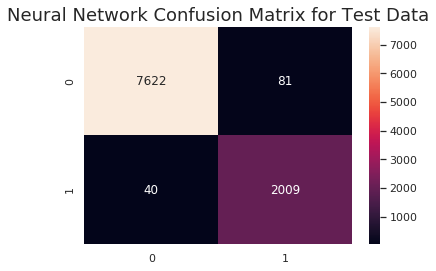

In [30]:
y_pred = model.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("Neural Network Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

# 6. Conclusion
Both of the models did great job when predicting occupancy. Our accuracy is nearly 98%. So what do you think, which method (ML or DL) is suitable for this dataset and problem?

Before answer that, look at the confusion matrix which are created when evaluating models with the test data. SVM model looks like biased toward occupied class. But we don't have that problem with neural network. So we can say that, we could use neural network for more stable and accurate results without significant errors.